<img src="booking.png" alt="Girl in cycyling" width="300" height="600">

Appenddix
-click on the link:
>1. <a href=#Imports> Imports</a>
>2. <a href=#Load> Load Data</a>
>3. <a href=#Formating> Data Formating</a>
>4. <a href=#valid> Validate Assumption(option If exist)</a>
>5. <a href=#EDA1> Exploratory Date Analysis(Uni-varible) </a>
>6. <a href=#EDA2> Exploratory Date Analysis(mulivarible-relationships)</a>
>7. <a href=#ques> Questions& Insights</a>
>8. <a href=#modB> Baseline Model</a>
>9. <a href=#DP> Data prep & Experimentation</a>


### Company Background:

Reservation is the arrangement you make when you book something like a hotel room, a table in a restaurant, a theater seat, or a place on public transportation.
Booking.com
Specialized in booking accommodation. Booking.com is available in 43 languages and offers over 28 million reported accommodation listings, including over 6.2 million homes, apartments and other unique places to stay. Wherever you want and whatever you want to do, Booking.com makes it easy and supports you with 24/7 customer support.


### MOTIVATIONS:
To create a model to predict the future outcome of a new hotel booking price based on features (word rate, rate, dimension)




### DESCRIBE DATA:

Collecting data from the internet "https://www.booking.com/"

I have 5 column and 146 rows.

hotel_Name : the name of the hotel.
price : Booking price
rate : the rate of the hotel  
distant: distant of the hotel to alhram
reviews: the reviews of the hotel  

price :I would expect as a target
Features :reviews ,rate and distant







## <a name=#Imports style=" font-size:150%;"> Helper Functions:</a>

In [1]:
def print_nas(df,cutoff):
    size=len(df)
    drop_col_list=[]
    
    for col in df.columns.to_list():
        num_nas=sum(df[col].isna())
        na_perc=round((num_nas/size)*100.00,2)
        print(col,":",num_nas,",",na_perc,"%")
        if na_perc>=cutoff:
            drop_col_list.append(col)
    visual_NA(df,True)
    return  drop_col_list


def visual_NA(dfina,col:bool):
    len_dfina=len(dfina)
    
    
    if col is True :
        (dfina.isna().sum()/len_dfina*100.00).hist()
        plt.title("Frequency for NAs in row")
        plt.xlabel("Percentage for NAs")
        plt.ylabel("Frequency ")
                
def dealing_out_of_outliers(col):
    Q3 = np.percentile(col, 75)
    Q1 = np.percentile(col, 25)
    IQR = Q3 - Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    outlier=[]
    for x in col:
        if ((x > upper) ^(x < lower)):
            outlier.append(x)
    print("out in the dataset is",outlier)
    col.plot(kind = 'box')


    
    
def infolimt(col):
    Q3 = np.percentile(col, 75)
    Q1 = np.percentile(col, 25)
    IQR = Q3 - Q1
    lower = (Q1-1.5)*IQR
    upper = (Q3+1.5)*IQR
    print("Interquartile range of the cnt is:",IQR,"and the upper lmit is ",upper,"and the lower lmit is",lower)

def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 


## <a name=#Imports style=" font-size:150%;"> Libraries Imports </a>

In [2]:
print("Importing ......",end="",flush=True)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pandas_profiling import ProfileReport
import seaborn as sns
sns.set()
from sklearn.pipeline import Pipeline
import math as m
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import sys 
import os
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.neural_network as nn
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
import requests
#supper warnings
import warnings
warnings.filterwarnings('ignore')
print("[Done]")

Importing ......Populating the interactive namespace from numpy and matplotlib
[Done]


## <a name=#Load> Load Data </a>

In [3]:
with open('booking1.html') as page:
    Booking_html = page.read()
soup1 = BeautifulSoup(Booking_html, 'lxml')

In [4]:
with open('booking2.html') as page:
    Booking_html = page.read()
soup2 = BeautifulSoup(Booking_html, 'lxml')

In [5]:
with open('booking3.html') as page:
    Booking_html = page.read()
soup3 = BeautifulSoup(Booking_html, 'lxml')

In [6]:
with open('booking4.html') as page:
    Booking_html = page.read()
soup4 = BeautifulSoup(Booking_html, 'lxml')

In [7]:
with open('booking5.html') as page:
    Booking_html = page.read()
soup5 = BeautifulSoup(Booking_html, 'lxml')

In [8]:
with open('booking6.html') as page:
    Booking_html = page.read()
soup6 = BeautifulSoup(Booking_html, 'lxml')

In [9]:
hotel_Name=[]
price=[]      
rating=[]   
distant=[]
priceDiscount=[]

In [10]:
for block in soup1.select('div[data-testid="property-card"]'):
    hotel_Name.append(block.select('div[data-testid="title"]')[0].text)
    price.append(block.select('div[data-testid="price-and-discounted-price"]')[0].text)
    distant.append(block.select('span[data-testid="distance"]')[0].text)
    rating.append(block.select('div[data-testid="review-score"]')[0].text)
    priceDiscount.append(block.select('div[data-testid="price-and-discounted-price"]')[0].text)

In [11]:
for block in soup2.select('div[data-testid="property-card"]'):
    hotel_Name.append(block.select('div[data-testid="title"]')[0].text)
    price.append(block.select('div[data-testid="price-and-discounted-price"]')[0].text)
    distant.append(block.select('span[data-testid="distance"]')[0].text)
    rating.append(block.select('div[data-testid="review-score"]')[0].text)
    priceDiscount.append(block.select('div[data-testid="price-and-discounted-price"]')[0].text)

In [12]:
for block in soup3.select('div[data-testid="property-card"]'):
    hotel_Name.append(block.select('div[data-testid="title"]')[0].text)
    price.append(block.select('div[data-testid="price-and-discounted-price"]')[0].text)
    distant.append(block.select('span[data-testid="distance"]')[0].text)
    rating.append(block.select('div[data-testid="review-score"]')[0].text)
    priceDiscount.append(block.select('div[data-testid="price-and-discounted-price"]')[0].text)

In [13]:
for block in soup4.select('div[data-testid="property-card"]'):
    hotel_Name.append(block.select('div[data-testid="title"]')[0].text)
    price.append(block.select('div[data-testid="price-and-discounted-price"]')[0].text)
    distant.append(block.select('span[data-testid="distance"]')[0].text)
    rating.append(soup4.select('div[data-testid="review-score"]')[0].text)
    priceDiscount.append(block.select('div[data-testid="price-and-discounted-price"]')[0].text)

In [14]:
for block in soup5.select('div[data-testid="property-card"]'):
    hotel_Name.append(block.select('div[data-testid="title"]')[0].text)
    price.append(block.select('div[data-testid="price-and-discounted-price"]')[0].text)
    distant.append(block.select('span[data-testid="distance"]')[0].text)
    rating.append(soup5.select('div[data-testid="review-score"]')[0].text)
    priceDiscount.append(block.select('div[data-testid="price-and-discounted-price"]')[0].text)

In [15]:
for block in soup6.select('div[data-testid="property-card"]'):
    hotel_Name.append(block.select('div[data-testid="title"]')[0].text)
    price.append(block.select('div[data-testid="price-and-discounted-price"]')[0].text)
    distant.append(block.select('span[data-testid="distance"]')[0].text)
    rating.append(soup6.select('div[data-testid="review-score"]')[0].text)
    priceDiscount.append(block.select('div[data-testid="price-and-discounted-price"]')[0].text)

In [16]:
dictionary ={
    "hotel_Name":hotel_Name,
    "price":price,
    "Rate":rating,
    "distant":distant,
    "discount": priceDiscount}

In [17]:
df_booking=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dictionary.items() ]))

In [18]:
df_booking

,hotel_Name,price,Rate,distant,discount
0,Le Meridien Makkah,SAR 468,"7.7Good5,059 reviews",0.4 km from centre,SAR 468
1,Violet Al Shisha Hotel,SAR 290SAR 119,"8.3Very good5,844 reviews",2.8 km from centre,SAR 290SAR 119
2,Makkah Towers,SAR 342SAR 325,"8.0Very good6,425 reviews",0.3 km from centre,SAR 342SAR 325
3,"Makkah Clock Royal Tower, A Fairmont Hotel",SAR 441,"8.2Very good20,064 reviews",0.3 km from centre,SAR 441
4,Jabal Omar Hyatt Regency Makkah,SAR 400,"8.4Very good20,014 reviews",0.5 km from centre,SAR 400
...,...,...,...,...,...
141,جوهرة الاهدل,SAR 90,"7.7Good5,059 reviews",4.4 km from centre,SAR 90
142,Nice Suites & Hotels,SAR 256,"7.7Good5,059 reviews",2.4 km from centre,SAR 256
143,سدير كرم,SAR 250,"7.7Good5,059 reviews",5.7 km from centre,SAR 250
144,المنزل,"SAR 1,000","7.7Good5,059 reviews",21.1 km from centre,"SAR 1,000"


In [19]:
df_booking.to_csv("df_Booking.csv")

In [20]:
df_Booking = pd.read_csv("df_Booking.csv")

In [21]:
df_Booking.shape

(146, 6)

In [22]:
print("Number of missing values in the data", df_Booking.isnull().sum().sum())

Number of missing values in the data 0


## <a name=#Formating> Data Formating</a>

In [23]:
df_Booking.dtypes

Unnamed: 0     int64
hotel_Name    object
price         object
Rate          object
distant       object
discount      object
dtype: object

In [24]:
df_Booking['Price'] =df_Booking["price"].str.replace("SAR", "").str.strip()


In [25]:
df_Booking['Price'] = df_Booking.Price.str.split().str[0]

In [26]:
df_Booking['discount'] =df_Booking["price"].str.replace("SAR", "").str.strip()

In [27]:
df_Booking['discount'] = df_Booking.Price.str.split().str[0]

In [28]:
df_Booking['distant'] =df_Booking["distant"].str.replace("km from centre", "").str.strip()

In [29]:
df_Booking['distant']=pd.to_numeric(df_Booking['distant'])

In [30]:
df_Booking['Price'] =df_Booking["Price"].str.replace(",", "").str.strip()

In [31]:
df_Booking['Price']=pd.to_numeric(df_Booking['Price'])

In [32]:
df_Booking['discount'] =df_Booking["discount"].str.replace(",", "").str.strip()

In [33]:
df_Booking['discount']=pd.to_numeric(df_Booking['discount'])

In [34]:
R = df_Booking["Rate"].str.split("d", n = 1, expand = True)

In [35]:
df_Booking["reviews"]=R[1]

In [36]:
df_Booking["reviews"]=df_Booking["reviews"].str.replace(" reviews", "").str.strip()

In [37]:
df_Booking['reviews'] =df_Booking["reviews"].str.replace(",", "").str.strip()

In [38]:
df_Booking['reviews']=pd.to_numeric(df_Booking['reviews'])

In [39]:
RR= df_Booking["Rate"].str.split("G", n = 1, expand = True)

In [40]:
df_Booking["Rate_num"]=RR[0]


In [41]:
RRR=df_Booking["Rate_num"].str.split("V", n = 1, expand = True)

In [42]:
df_Booking["Rate_num"]=RRR[0]

In [43]:
df_Booking['Rate_num']=pd.to_numeric(df_Booking['Rate_num'],errors='coerce')


In [44]:
df_Booking.drop('price',axis='columns', inplace=True)

In [45]:
df_Booking.drop('discount',axis='columns', inplace=True)

In [46]:
df_Booking.dtypes

Unnamed: 0      int64
hotel_Name     object
Rate           object
distant       float64
Price           int64
reviews       float64
Rate_num      float64
dtype: object

In [47]:
df_Booking.drop('Rate',axis='columns', inplace=True)

In [48]:
df_Booking.drop(["Unnamed: 0"], axis=1, inplace=True)

In [49]:
df_Booking.shape

(146, 5)

In [50]:
df_Booking.size

730

## <a name=#valid> Validate Assumption:</a>

In [51]:
df_Booking.duplicated().sum()

5

In [52]:
df_Booking=df_Booking.drop_duplicates()

In [53]:
df_Booking.size

705

In [54]:
df_Booking.isnull()

,hotel_Name,distant,Price,reviews,Rate_num
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
141,False,False,False,False,False
142,False,False,False,False,False
143,False,False,False,False,False
144,False,False,False,False,False


In [55]:
df_Booking["distant"].value_counts()

0.3     12
4.0      7
0.5      6
0.8      5
3.6      5
        ..
1.7      1
21.1     1
4.5      1
4.4      1
6.2      1
Name: distant, Length: 62, dtype: int64

In [56]:
df_Booking["distant"].nunique()

62

In [57]:
#to colcalate the nunique of each col
for col in df_Booking.columns.to_list():
    num_uniq= df_Booking[col].nunique()
    if num_uniq <=10:
        uniq_list=df_Booking[col].nunique()
    else:
         uniq_list="more than 10"
    print(col,":",num_uniq,",",uniq_list)

hotel_Name : 141 , more than 10
distant : 62 , more than 10
Price : 87 , more than 10
reviews : 51 , more than 10
Rate_num : 15 , more than 10


## <a name=#EDA1> Exploratory Date Analysis(Uni-varible): </a>

[Text(0.5, 1.0, ' frequency value of Rate number')]

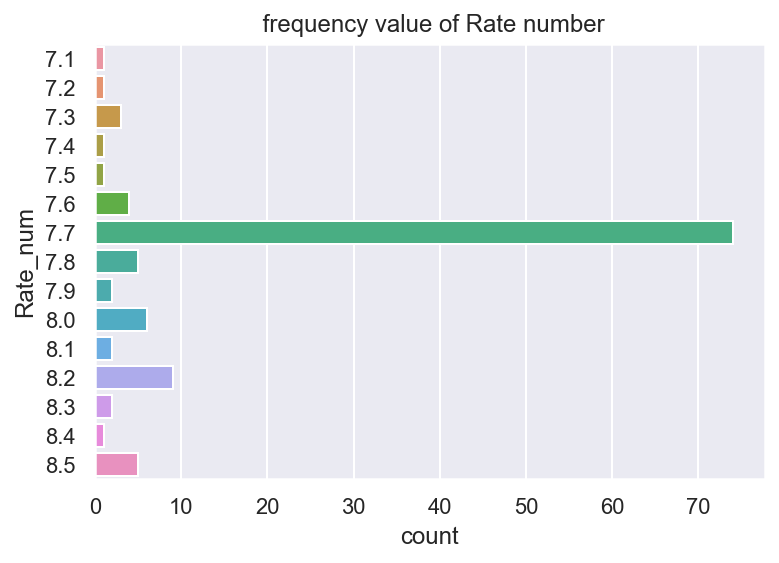

In [259]:

sns.countplot(y="Rate_num", data=df_Booking).set(title=' frequency value of Rate number')

<AxesSubplot:ylabel='Rate_num'>

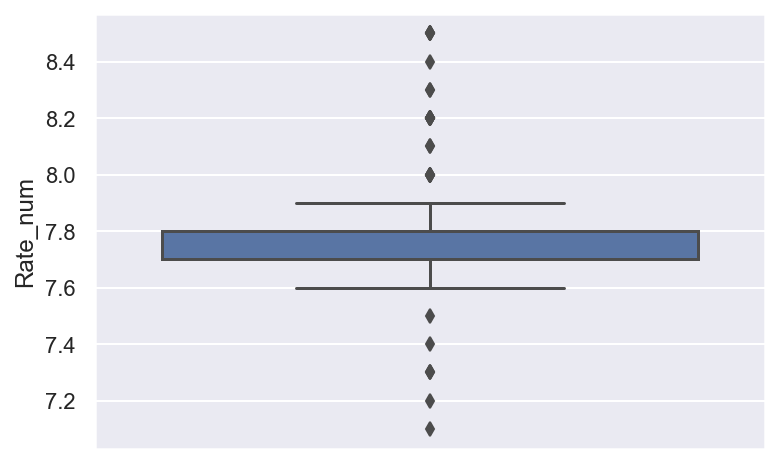

In [58]:
#outliers of the Rate_num
sns.boxplot(data=df_Booking,y="Rate_num")

<AxesSubplot:ylabel='distant'>

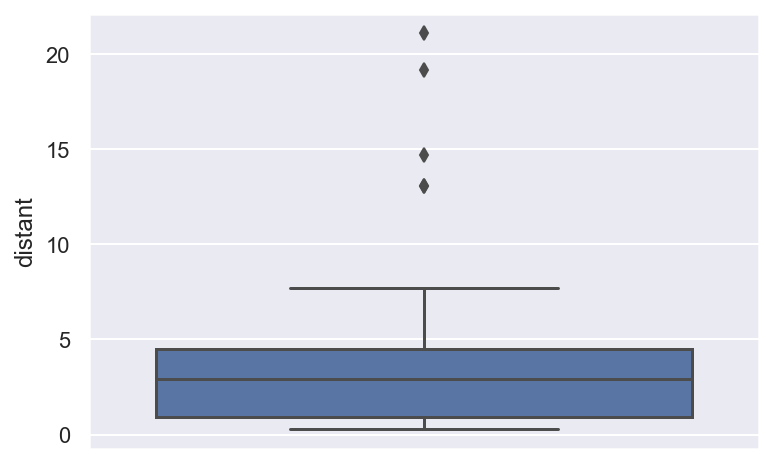

In [59]:
#outliers of the distant
sns.boxplot(data=df_Booking,y="distant")

<AxesSubplot:ylabel='Price'>

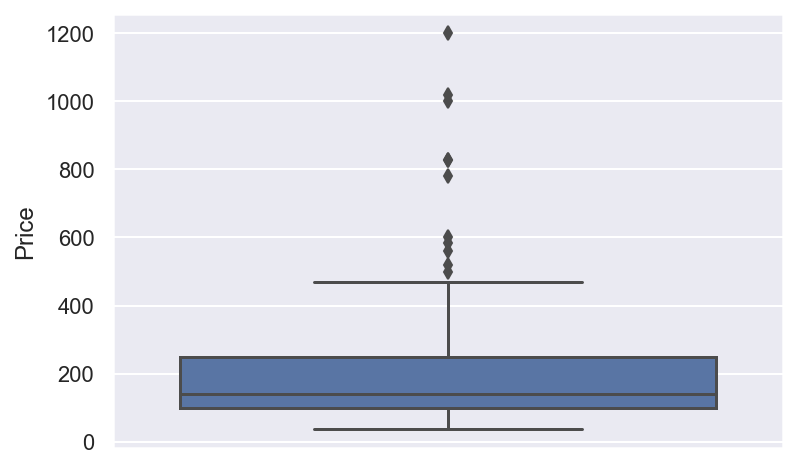

In [60]:
#outliers of the Price
sns.boxplot(data=df_Booking,y="Price")

<AxesSubplot:ylabel='reviews'>

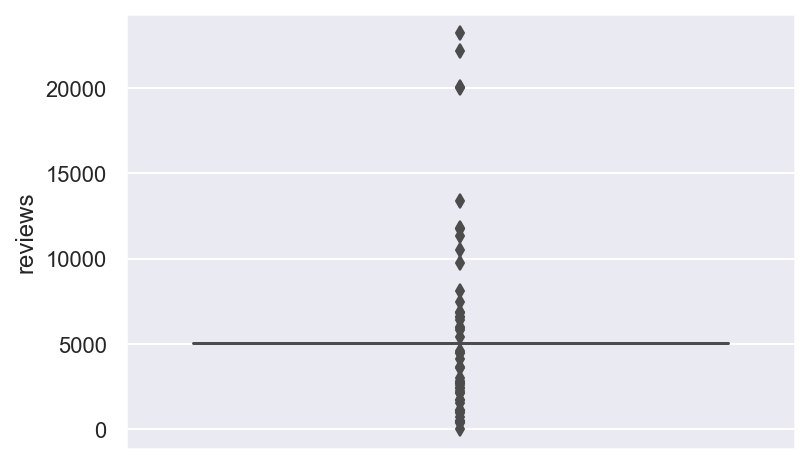

In [61]:
#outliers of the reviews
sns.boxplot(data=df_Booking,y="reviews")

In [62]:
infolimt(df_Booking.Price)

Interquartile range of the cnt is: 150.0 and the upper lmit is  37725.0 and the lower lmit is 14775.0


## <a name=#EDA2> Exploratory Date Analysis(mulivarible-relationships):</a>

<Figure size 2160x1440 with 0 Axes>

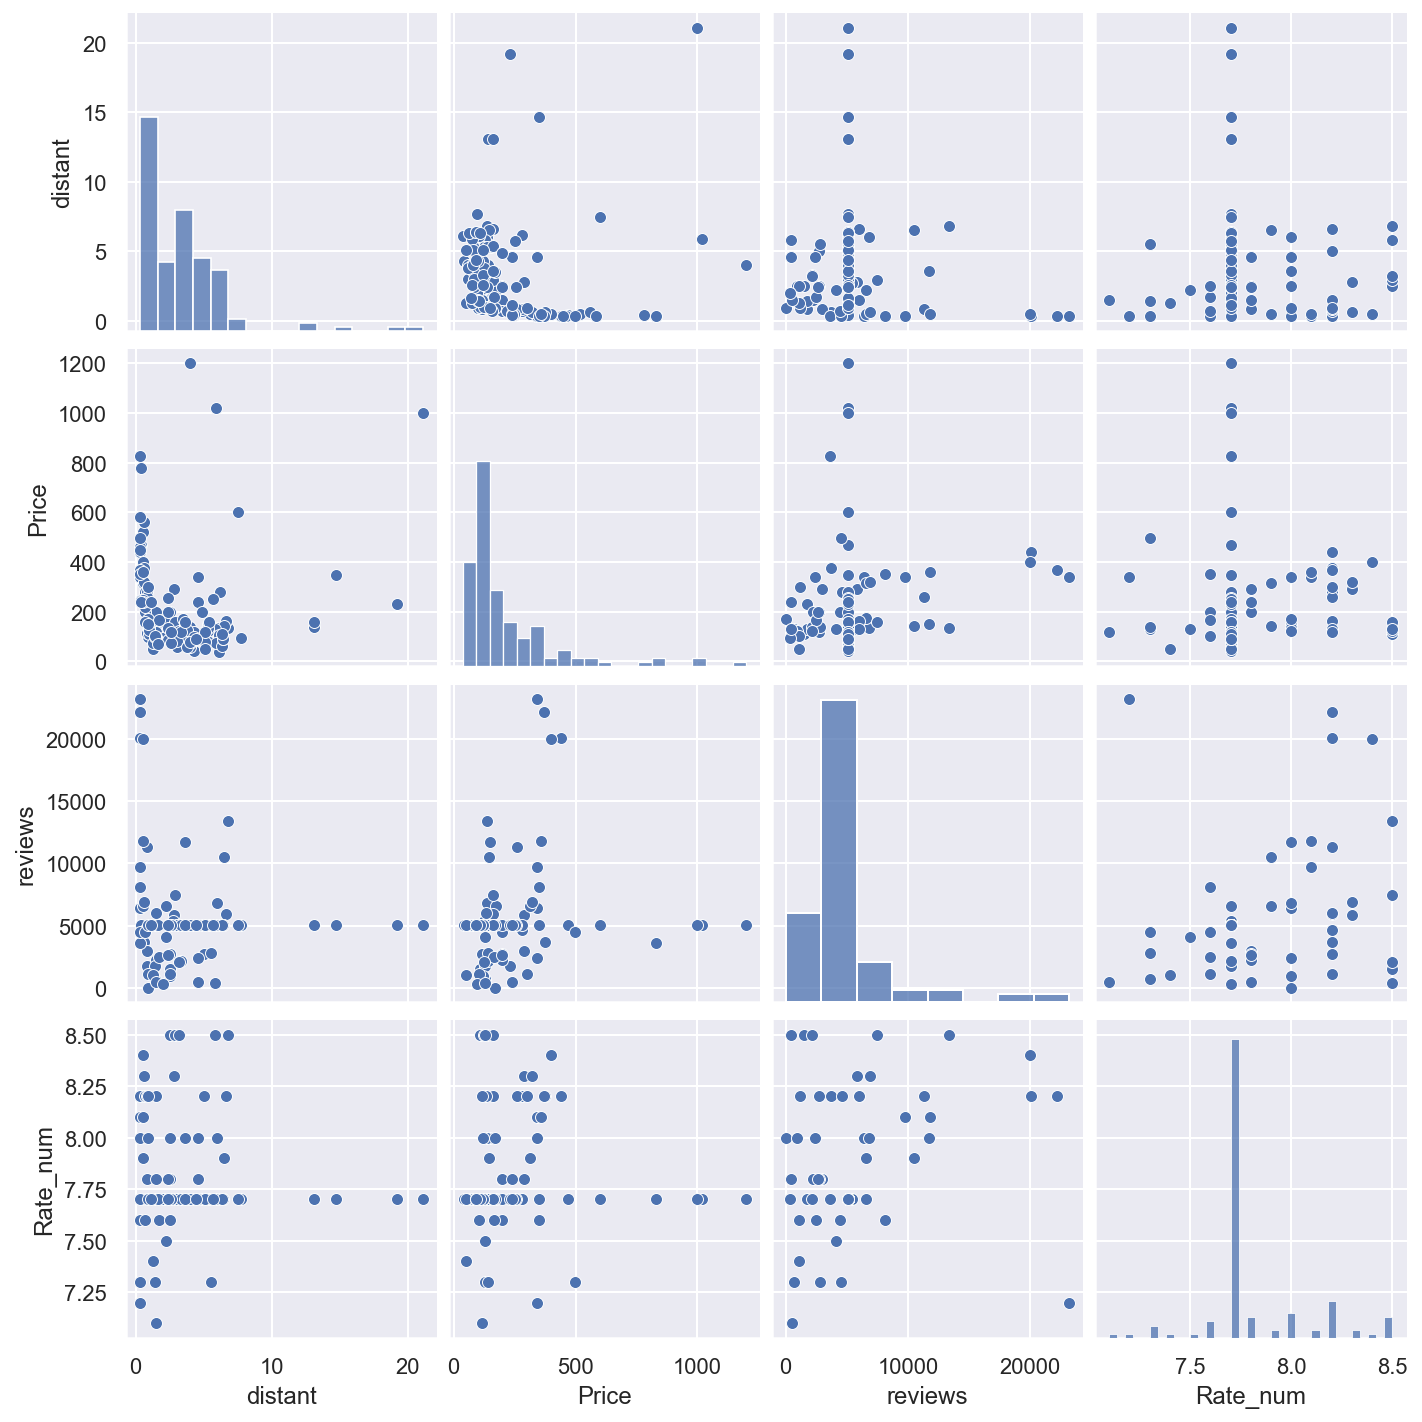

In [63]:
#let's plot everything in groups of two
plt.figure(figsize=(30,20))
sns.pairplot(df_Booking[['hotel_Name', 'distant', 'Price', 'reviews', 'Rate_num']])
plt.show()

<AxesSubplot:>

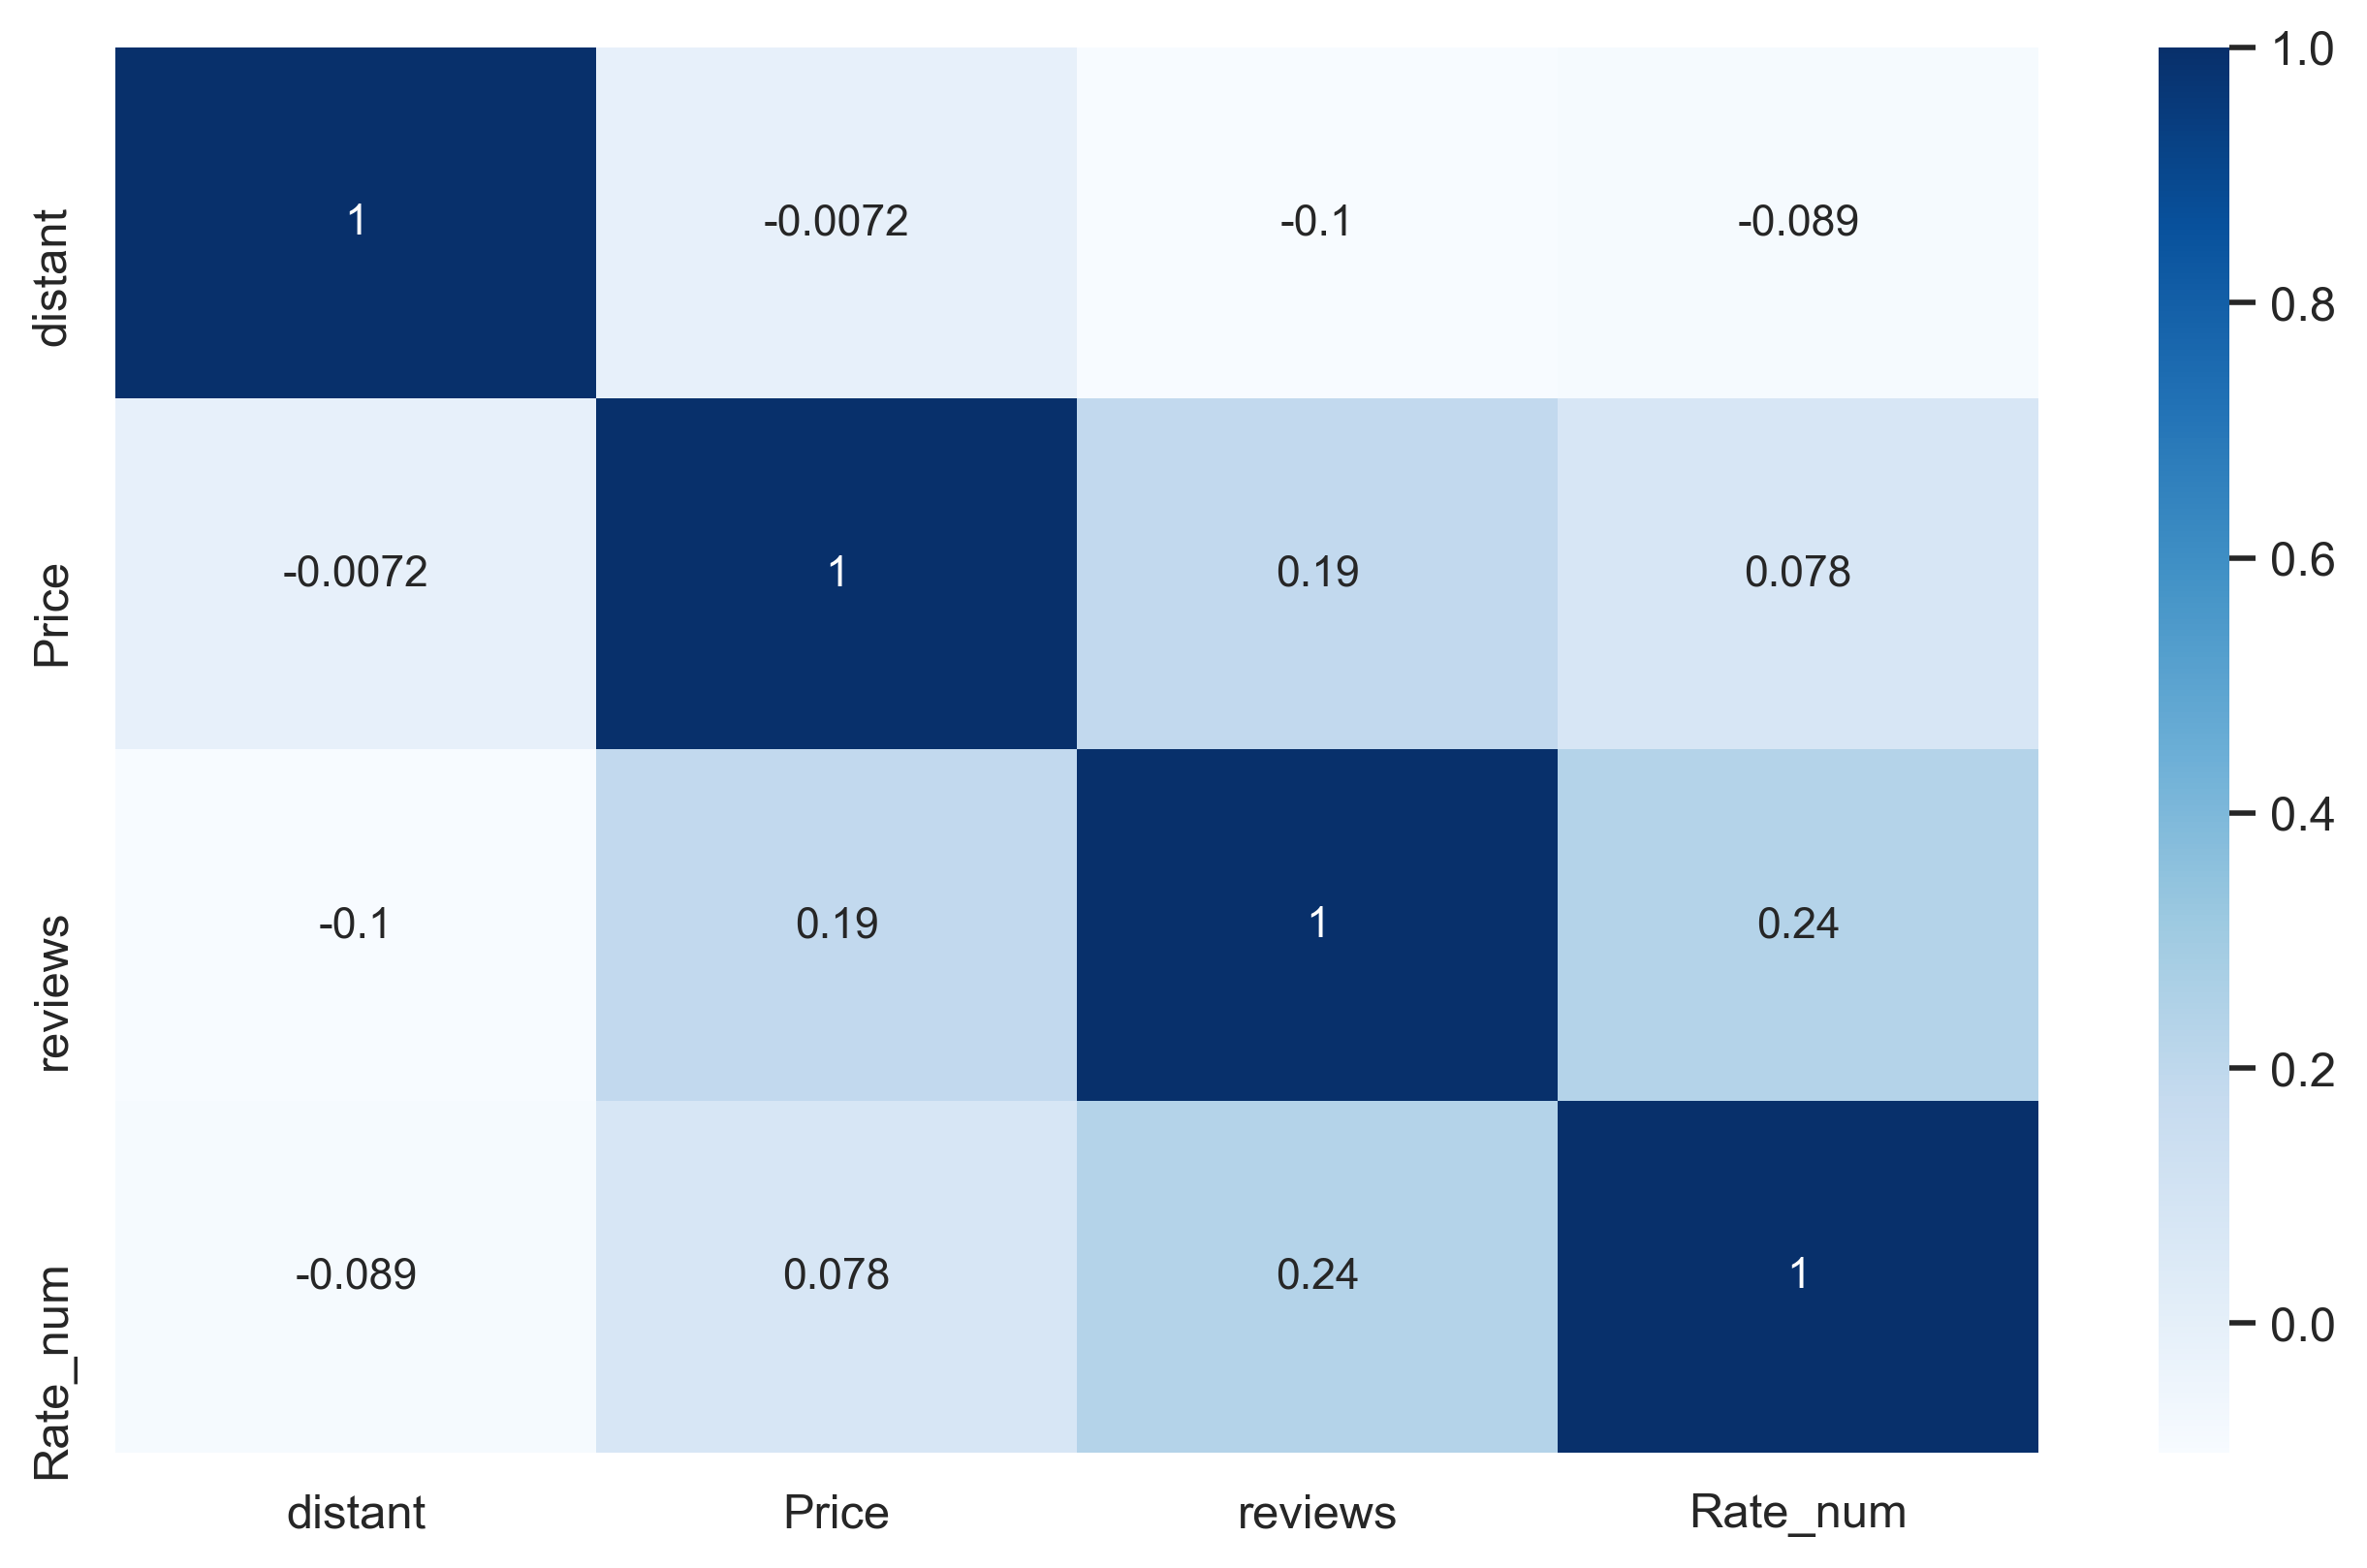

In [266]:
#to show all correlation betwan each columns

plt.figure(figsize=(10,6), dpi=160)
sns.heatmap(df_Booking.corr(),annot=True,cmap="Blues")

[Text(0.5, 1.0, 'distribution of the Rate_num')]

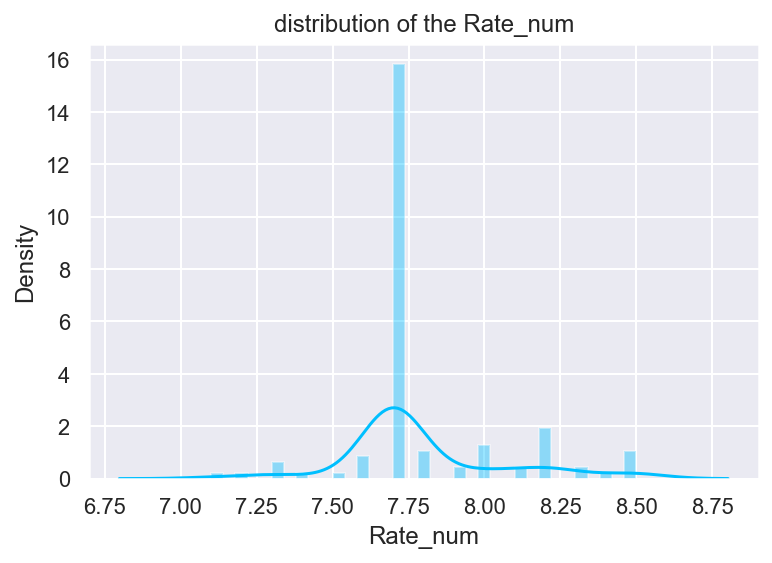

In [65]:
#let's look at the distribution of the Rate_num 
sns.distplot(df_Booking['Rate_num'], label='Rate_num',color="#00BFFF").set(title='distribution of the Rate_num')

## <a name=#ques> Questions& Insights:</a>

In [66]:
#find what the hotel_Name Closest to Haram 
df_Booking[df_Booking.distant==df_Booking["distant"].min()]

,hotel_Name,distant,Price,reviews,Rate_num
2,Makkah Towers,0.3,342,6425.0,8.0
3,"Makkah Clock Royal Tower, A Fairmont Hotel",0.3,441,20064.0,8.2
8,Pullman ZamZam Makkah,0.3,342,23188.0,7.2
10,Movenpick Makkah Hajar Tower,0.3,342,9730.0,8.1
13,Swissotel Al Maqam Makkah,0.3,369,22165.0,8.2
15,Retaj Al Bayt Suites,0.3,828,3603.0,7.7
17,Makkah Hotel,0.3,460,NaN,NaN
18,Al Ghufran Safwah Hotel Makkah,0.3,583,NaN,NaN
20,Al Marwa Rayhaan by Rotana - Makkah,0.3,352,8087.0,7.6
32,Al Safwah Royale Orchid Hotel,0.3,499,4503.0,7.3


In [67]:
#find what the hotel_Name when the Rate_num (highest value)
df_Booking[df_Booking.Rate_num==df_Booking["Rate_num"].max()]

,hotel_Name,distant,Price,reviews,Rate_num
27,Four Points by Sheraton Makkah Al Naseem,6.8,135,13391.0,8.5
28,Olayan Diamond Hotel - Al Maabda,2.5,110,1524.0,8.5
63,Violet Al Azizia Hotel,2.9,160,7463.0,8.5
67,M Hotel Al Dana Makkah by Millennium,3.2,123,2118.0,8.5
73,فندق ٢١ Hotel 21,5.8,130,427.0,8.5


In [68]:
df_Booking[(df_Booking.Rate_num==8.0)&(df_Booking.distant==0.3)]

,hotel_Name,distant,Price,reviews,Rate_num
2,Makkah Towers,0.3,342,6425.0,8.0


## <a name=#modB> Baseline Model:</a>

### Define the target and features:

In [217]:
X=df_Booking.drop("Price",axis=1)
y=df_Booking[("Price")]

### Define train and test:

In [218]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=42)

### numeric_X_train_val_test:

In [219]:
X_train=X_train.select_dtypes(include=np.number)
X_val=X_val.select_dtypes(include=np.number)
X_test=X_test.select_dtypes(include=np.number)

### BASELINE R2 :

In [220]:
X_trainBL=X_train.fillna(0)
lm=LinearRegression()
lm.fit(X_trainBL,y_train)
lm.score(X_trainBL,y_train)

0.13580390301708867

In [221]:
X_valBL=X_val.fillna(0)
lm.score(X_valBL,y_val)


0.031317874051118744

## <a name=#DP> Data prep & Experimentation:</a>

In [222]:
df_Booking.head()

,hotel_Name,distant,Price,reviews,Rate_num
0,Le Meridien Makkah,0.4,468,5059.0,7.7
1,Violet Al Shisha Hotel,2.8,290,5844.0,8.3
2,Makkah Towers,0.3,342,6425.0,8.0
3,"Makkah Clock Royal Tower, A Fairmont Hotel",0.3,441,20064.0,8.2
4,Jabal Omar Hyatt Regency Makkah,0.5,400,20014.0,8.4


In [223]:
fillna_dict={}
def impute_fit(df_fillna):
    fillna_dict.clear()
    for col in df_fillna.select_dtypes(exclude=np.number).columns:
        fillna_dict[col]=df_fillna[col].mode(dropna=True).values[0]
    for col in df_fillna.select_dtypes(include=np.number).columns:
        fillna_dict[col]=df_fillna[col].mean()
    
def impute_transform(df_fillna):
    for col in df_fillna.columns:
        df_fillna[col].fillna(fillna_dict[col],inplace=True)
    return df_fillna

### ex1 fill na (mean):

In [224]:
X_trainM=X_train
impute_fit(X_trainM)
X_trainM = impute_transform(X_trainM)


lm=LinearRegression()
lm.fit(X_trainM,y_train)
lm.score(X_trainM,y_train)

0.11480466465839922

In [225]:
x_valM=X_val

x_valM = impute_transform(x_valM)

lm.score(x_valM,y_val)

0.021306965360994967

### ex2 binomial:

In [249]:


X2T=X_train.copy()
X2V=X_val.copy()



X2T['r2'] = X2T['Rate_num'] ** 2 

X2V['r2'] = X2V['Rate_num'] ** 2 




impute_fit(X2T)
X2T= impute_transform(X2T)




lm.fit(X2T,y_train)
lm.score(X2T,y_train)






0.12303785543256962

In [250]:
X2V =impute_transform(X2V)

lm.score(X2V,y_val)

0.025497873308922503

### Scale your features

In [228]:
# define standard scaler
scaler = StandardScaler()

X_trainS=X_train

scaler.fit(X_trainS.values)

StandardScaler()

In [229]:
X_valS=X_val


X_tr = scaler.transform(X_trainS.values)
X_va = scaler.transform(X_valS.values)

In [230]:
type(X_va), type(X_tr)

(numpy.ndarray, numpy.ndarray)

(array([ 3.,  1.,  1., 45., 15.,  2.,  6.,  6.,  2.,  3.]),
 array([-2.47415794, -1.93809038, -1.40202283, -0.86595528, -0.32988772,
         0.20617983,  0.74224738,  1.27831493,  1.81438249,  2.35045004,
         2.88651759]),
 <BarContainer object of 10 artists>)

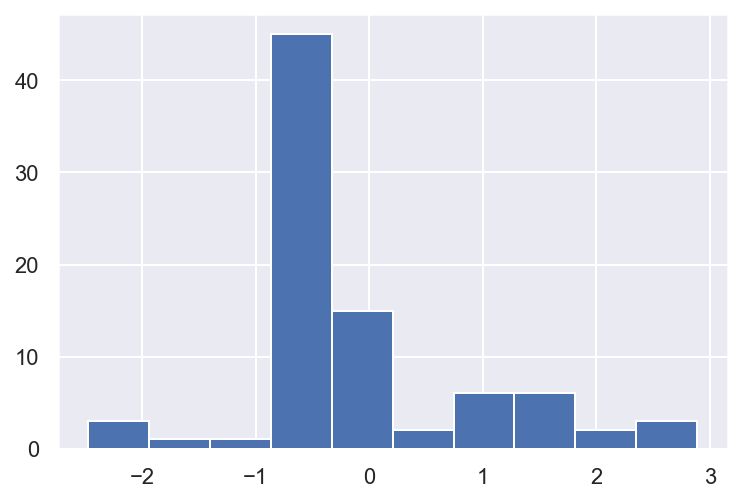

In [231]:
plt.hist(X_tr[:,2])

### exp3 Fit a LASSO model on the standardized data:

In [232]:
lasso_model = Lasso(alpha = 10)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10)

In [233]:
list(zip(X_trainS.columns, lasso_model.coef_))

[('distant', -32.592233037526526),
 ('reviews', 24.359509214184314),
 ('Rate_num', 6.073427148208835)]

In [234]:
lasso_model.score(X_tr,y_train)

0.10649434521700452

In [235]:
lasso_model.score(X_va,y_val)

0.020221904067340812

### exp4 Fit a Ridge model on the standardized data:

In [236]:
lr_model_ridge = Ridge(alpha = 9)
lr_model_ridge.fit(X_tr, y_train)

Ridge(alpha=9)

In [237]:
list(zip(X_trainS.columns, lr_model_ridge.coef_))

[('distant', -37.12983805675719),
 ('reviews', 30.039530851280347),
 ('Rate_num', 13.807108226388937)]

In [238]:
lr_model_ridge.score(X_tr, y_train)

0.11400748765228308

In [239]:
lr_model_ridge.score(X_va, y_val)

0.02199536445127359

In [240]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

In [241]:
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params).fit(X_tr, y_train)

In [242]:
lasso_grid.best_estimator_

Lasso(alpha=0.02)

In [243]:
lasso_grid.best_score_

-0.2826074507486746

In [244]:
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params).fit(X_tr, y_train)

In [245]:
ridge_grid.best_estimator_

Ridge(alpha=200)

In [246]:
ridge_grid.best_score_

-0.4576832975079239

### ex5 Basic feature engineering adding interaction terms

In [254]:

X3T=X_train.copy()
X3V=X_val.copy()




XT3['Re_d'] = XT3['reviews']+ XT3['Rate_num']
X3V['Re_d'] = X3V['reviews']+ X3V['Rate_num']



impute_fit(XT3)
XT3= impute_transform(XT3)




lm.fit(XT3,y_train)
lm.score(XT3,y_train)



0.11480466465840189

In [256]:
X3V =impute_transform(X3V)

lm.score(X3V,y_val)

0.021306965360896712